<p align="right"><i>Data Analysis for the Social Sciences - Part II - YYYY-MM-DD</i></p>

# Week 11 - Inferential Analysis

Welcome to Part II of Data Analysis for the Social Sciences. In this lab session we will conduct a range of inferential statistical analyses and tests for categorical and numeric variables.

We will use real data from the *British Social Attitudes survey, 2019: Poverty and Welfare*, specifically the open dataset available from the UK Data Service: https://doi.org/10.5255/UKDA-SN-8850-1

We will structure our analyses around the following research question:

<p><center><i>Are attitudes to welfare associated with sex, age, interest in politics, and perception of benefits fraud?</i></center></p>

### Aims

This lesson - **Inferential Analysis** - has two aims:
1. Demonstrate how to calculate and communicate measures of uncertainty relating to your quantitative findings.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with minimal prior knowledge or experience of quantitative data analysis.
* **Duration**: 45-60 minutes.
* **Pre-requisites**: Completed [*Univariate Data Analysis*](./dass-week-9-univariate-analysis.ipynb), [*Bivariate Data Analysis*](./dass-week-10-bivariate-analysis.ipynb) and [*Multivariate Data Analysis*](./dass-week-11-multivariate-analysis.ipynb) lessons.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting inferential analyses.
	2. Understand how to select and apply common data analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Introduction to Inferential Analysis*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `[]`.**

To execute a cell, click or double-click the cell and press the `Play` button next to the cell or select the `Run` button on the top toolbar (*Runtime > Run the focused cell*); you can also use the keyboard shortcuts `Shift + Enter` or `Ctrl + Enter`).

Try it for yourself:

In [2]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and inferential analysis!"))

Enter name:  ssd


[1] "Hi, ssd enjoy learning more about R and inferential analysis!"


Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [3]:
x * 5

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [4]:
x <- 10 # create an object called 'x' and give it the value '10'

In [5]:
x * 5 # multiply 'x' by 5

[1] 50

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there are times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Introduction to Inferential Analysis

In the [**previous lessons**](https://github.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/blob/main/lessons), we learned how to conduct a range of univariate, bivariate and multivariate analyses. The results of these analyses are often quite precise and accurate:
* The perceived percentage of individuals engaging in benefit fraud (35.8%).
* The average welfare score (2.731).

However the ability to produce such exact summaries ignores the great deal of **uncertainty** associated with any piece of quantitative data analysis. For example, how confident are we that the wider population of British adults perceive that 35.8 out of 100 benefit claimants are doing so fraudulently? If it isn't 35.8, then how much larger or smaller is the 'true' estimate of fraud in the wider British population (e.g., if you were able to survey all c. 50mn adults)? 

Remember, our estimate comes from the **sample** of people who happened to participate in the *British Social Attitudes survey 2019*. Is this group perfectly representative of the wider **population** from which it was drawn (18+ year olds in Britain)?

The short answer is this:

<p><center><i>Samples will always differ from the population they were drawn from due to random chance</i></center></p>

Thus in this lesson we will focus on expressing the inherent uncertainty in our quantitative analyses. There are a variety of measures of uncertainty but all are united by trying to answer the following question:
* Can we generalise our result to the wider population from which we drew our sample?

That is, can we make inferences about units of analysis (e.g., British adults) that were **not included** in our sample i.e., those in the wider population?

## Making Inferences

### Importing data

The first step is to import the *British Social Attitudes survey* data for analysis.

In [7]:
bsa2019 <- read.table("https://raw.githubusercontent.com/DiarmuidM/data-analysis-for-the-social-sciences-2023/main/lessons/data/bsa2019_poverty_open.tab", header=TRUE, na="NA", sep="\t")
head(bsa2019) # view the first six observations

,Sserial,WtFactor,RSex,RAgeCat,eq_inc_quintiles,RClassGp,HEdQual3,Married,ChildHh,skipmeal,⋯,Dole,TaxSpend,MuchPov,Poverty1,Poverty2,NatFrEst,incdiffs,welfare2,leftrigh,libauth
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,310001,0.9119594,2,6,-1,1,2,1,2,-1,⋯,3,3,8,2,1,5,-1,2.500,2.4,3.500000
2,310002,0.4439626,2,3,5,1,2,2,2,1,⋯,2,3,2,2,2,30,2,3.125,2.0,3.833333
3,310003,1.2182741,2,4,-1,1,3,1,1,-1,⋯,2,2,2,2,2,50,-1,3.125,2.2,4.166667
4,310004,1.5839969,1,2,4,1,2,4,2,-1,⋯,3,3,2,2,1,50,-1,2.250,3.2,2.166667
5,310005,0.4743091,1,6,-1,5,4,4,2,1,⋯,2,3,1,2,1,50,4,3.375,1.6,4.666667
6,310006,1.1363125,1,4,1,3,8,1,1,-1,⋯,2,2,1,1,1,10,-1,2.875,1.8,3.666667


In [17]:
nrow(bsa2019) # number of rows (observations) in the dataset

[1] 3224

### Data cleaning

There are a number of important steps that need to be executed before proceeding with the analysis:
* Handling missing values
* Labelling values of categorical variables

We cover these techniques in a separate notebook: [Data Cleaning](./dass-bsa-data-cleaning.ipynb) 

**Please note that you will be expected to perform these tasks for your own analysis.**

In [8]:
bsa2019$welfare2[bsa2019$welfare2<1 | bsa2019$welfare2>5] <- NA # convert "-1" and "9" to missing

In [9]:
bsa2019$NatFrEst[bsa2019$NatFrEst>100] <- NA # convert "998" and "999" to missing

In [10]:
bsa2019$RSex <- factor(bsa2019$RSex, levels = c(1,2), labels = c("Male", "Female"))

In [11]:
bsa2019$RAgeCat <- factor(bsa2019$RAgeCat, levels = c(1,2,3,4,5,6,7), labels = c("18-24", "25-34", "35-44", "45-54", "55-59", "60-64", "65+"))

In [12]:
bsa2019$Married <- factor(bsa2019$Married, levels = c(1,2,3,4), labels = c("Married/living as married", 
                                                                               "Separated/divorced", 
                                                                               "Widowed", 
                                                                               "Never married"))

In [13]:
bsa2019$HEdQual3 <- factor(bsa2019$HEdQual3, levels = c(1,2,3,4), labels = c("Degree", "Below degree / A level", "O level", "No qual"))

### Univariate analysis

Univariate analysis produces statistical summaries of numeric and categorical variables e.g., average attitude to welfare; proportion of respondents with a degree etc. However these single numbers give an inflated sense of accuracy and precision. Thus we need some way of expressing the **range** of plausible values for a given statistical summary. You may have heard of this range referred to as **confidence intervals**, **margins of error**, **polling error** etc.

#### Numeric variables

Let's look at an example for our measure of perceived benefit fraud (`NatFrEst`).

In [14]:
summary(bsa2019$NatFrEst)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    10.0    30.0    35.8    50.0   100.0     246 

We see that the average estimate of benefit fraud is 35.8 individuals out of every 100 claimants. However this finding was generated by using data on our current sample of 3,224 18+ year olds in Britain who were surveyed in 2019. What if we had a different sample of respondents, both in terms of size and the individuals surveyed? Would we also expect the average estimate to be exactly the same across all potential samples?

Thanks to sampling theory, we can produce a range or interval of plausible values for the average (mean) of a numeric variable.

In [18]:
t.test(bsa2019$NatFrEst, na.rm = TRUE)$conf.int # calculate 95% confidence intervals for the mean of `NatFrEst`

[1] 34.85875 36.74299
attr(,"conf.level")
[1] 0.95

The one-line summary is this: the mean estimate of benefit fraud in the wider population of British adults is very probably between '34.9' and '36.7'. The sample figure of '35.8' remains our best estimate but we now acknowledge that the score in the population could actually be between '34.9' and '36.7'.

This can be tricky to get your head around, so let's look at another example: attitude to welfare (`welfare2`).

In [19]:
mean(bsa2019$welfare2, na.rm = TRUE)

[1] 2.731137

In [21]:
t.test(bsa2019$welfare2, na.rm = TRUE)$conf.int # calculate 95% confidence intervals for the mean of `welfare2`

[1] 2.706688 2.755586
attr(,"conf.level")
[1] 0.95

The mean attitude to welfare is '2.73' (slightly unsympathetic), but we acknowledge that the mean score in the wider population from which the sample was drawn could actually be between '2.71' and '2.76'. Therefore the range of the confidence interval is very tight around the mean, providing confidence that '2.73' is a good estimate of average attitudes to welfare.

Imagine our mean was still '2.73' but the confidence interval ranged from '1.55' to '4.29'. Now the mean does not look like such a good estimate of the average attitude to welfare, as its 'true' value in the wider population could be much lower or much higher.

Calculating a confidence interval does not invalidate your estimate of the mean of a numeric variable, it simply provides some caution when making claims about a **population** based on a **sample**.

#### Categorical variables

We can also calculate a range of uncertainty for categories of a categorical variable.

In [22]:
round(prop.table(table(bsa2019$HEdQual3)) * 100, 0)


                Degree Below degree / A level                O level 
                    25                     27                     26 
               No qual 
                    22 

We observe that 25% of respondents claim their highest qualification is a degree. Is this a good estimate of the 'true' percentage of adults in Britain with a degree?

In [ ]:
install.packages("DescTools") # install the necessary package - only needs to be done once

In [23]:
library(DescTools) # import the package containing the `MultinomCI` command

In [26]:
MultinomCI(table(bsa2019$HEdQual3)) # 95% confidence interval is the default

,est,lwr.ci,upr.ci
Degree,0.2511083,0.2324256,0.2701329
Below degree / A level,0.2697910,0.2511083,0.2888157
O level,0.2609246,0.2422419,0.2799493
No qual,0.2181761,0.1994934,0.2372007


Note that proportions are reported but you can convert to percentages by multiplying by 100.

We are 95% confident that the 'true' percentage of adults in Britain who have a degree is between 23% and 27% (lwr.ci = lower end of the confidence interval, upr.ci = upper end of the confidence interval).

**TASK**: Calculate confidence intervals for the `Married` variable. Look at the [codebooks](./codebook/8850_bsa_open_poverty_2019_codebook.pdf) to see what this variable measures.

In [ ]:
# INSERT CODE HERE

#### A note on confidence

You'll have seen reference to '95% confidence interval' and rightly wondered what it meant.

Let's imagine that the *British Social Attitudes survey* was completed by 100 different samples of respondents (obviously this would be wildly expensive, impractical and unnecessary). The sampling procedure is the same (i.e., random sampling) and the sample sizes are the same (i.e., 3,224). And for each sample we calculate the mean of some numeric variable - let's say perceived level of benefit fraud.

In such a scenario, a 95% confidence interval represents the following:
* 95 of the 100 samples have a mean that falls **into** the range between '34.9' and '36.7'
* 5 of the 100 samples have a mean that falls **outside** of the range between '34.9' and '36.7'

The intractable problem is that we have no way telling whether the **actual** sample we observed (i.e., the people who completed the *British Social Attitudes survey*) is one of the 95 or one of the 5. 

All we know is that 95 times out of 100 the mean falls between a given range of values for a given sampling process.

### Bivariate Analysis

A key aspect of bivariate analysis is producing a **measure of association** that summarises the strength / direction of a relationship between two variables. In this instance our uncertainty is not related to the exact value of a measure of association, **but in how confident we are that the relationship is present in the population from which the sample was drawn**.

For example, we find a weak association between sex and relationship status:

In [27]:
CramerV(bsa2019$RSex, bsa2019$Married)

[1] 0.146905

How confident are we that this association exists in the population of British adults and not just in our sample? We can answer this question by calculating what are known as measures of **statistical significance**. 

A common measure of statistical significance is a **p-value**. This can be interpreted as a proportion, ranging from 0 to 1. In contrast to measures of association, we are interested in values close to 0, as these indicate a low chance of your association **NOT** being found in the population from which your sample was drawn. Put another way:
* a p-value < 0.05 indicates a high probability that the association is found in the wider population and not just in the sample.
* an association with a p-value < 0.05 is therefore said to be **statistically significant**. 

Therefore a p-value &mdash; and other measures of statistical significance &mdash; provides a summary of our confidence in the **generalisability** of the association / pattern we observe in the data.

#### Categorical vs Categorical

Let's return to the association between sex and relationship status:

In [28]:
CramerV(bsa2019$RSex, bsa2019$Married)

[1] 0.146905

In [31]:
options(scipen=999) # suppress scientific notation
chisq.test(bsa2019$RSex, bsa2019$Married)


	Pearson's Chi-squared test

data:  bsa2019$RSex and bsa2019$Married
X-squared = 69.513, df = 3, p-value = 0.000000000000005428


We observe that the p-value is well below the 0.05 threshold, therefore we conclude that the association is statistically significant. That is, the association is very likely present in the population from which the sample was drawn.

Even weak associations are likely to generate small p-values if the sample is large enough.

What if we had a smaller sample of respondents?

In [33]:
bsa2019_samp <- bsa2019[sample(nrow(bsa2019), 100), ] # randomly sample 100 observations from the dataset

In [34]:
CramerV(bsa2019_samp$RSex, bsa2019_samp$Married)

[1] 0.230095

In [36]:
options(scipen=999) # suppress scientific notation
chisq.test(bsa2019_samp$RSex, bsa2019_samp$Married)


	Pearson's Chi-squared test

data:  bsa2019_samp$RSex and bsa2019_samp$Married
X-squared = 5.2944, df = 3, p-value = 0.1515


**QUESTION:** Why is the p-value no longer below the 0.05 threshold? Put another way: why are we less confident that the association we observed in the sample also exists in the population from which the sample was drawn?

#### Categorical vs Numeric

Recall that the appropriate summary statistic for a bivariate analysis of one categorical and one numeric variable is:
* *Eta squared*

This tells us the strength of the association but not the direction. *Eta squared* coefficient ranges from 0 to 1, with higher values representing stronger associations.

In [37]:
#install.packages("lsr") # install the necessary package - only needs to be done once

In [38]:
library(lsr) # import the package containing the `etaSquared()` command

In [39]:
model <- aov(welfare2 ~ RAgeCat, data = bsa2019)
etaSquared(model)

,eta.sq,eta.sq.part
RAgeCat,0.004278666,0.004278666


We can recover the p-value for this association by summarising the results of the `aov(welfare2 ~ RAgeCat, data = bsa2019)` command:

In [40]:
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)  
RAgeCat        6    4.4  0.7371   1.842 0.0872 .
Residuals   2572 1029.2  0.4002                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
645 observations deleted due to missingness

In this instance we are looking at the `Pr(>F)` statistic, which is another way of describing a p-value.

This is slightly above the '0.05' threshold and thus we would conclude that the non-existent association might not be present in the population from which the sample was drawn.

#### Numeric vs Numeric

Recall that the appropriate measure of association for two numeric variables is:
* *Pearson's correlation coefficient (r)*

Similar to other measures of association, it tells us the strength and direction of the association between two variables. The coefficient ranges between -1 and 1, with negative values representing negative associations, and positive values positive associations. Values closer to -1 or 1 indicate stronger associations than those closer to 0.

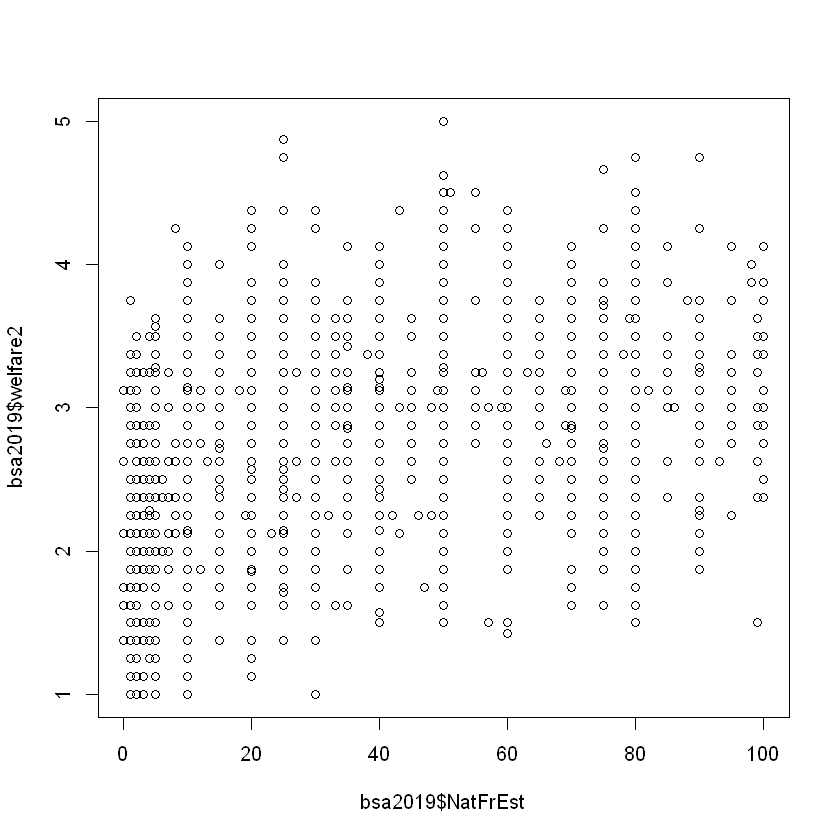

In [41]:
plot(bsa2019$NatFrEst, bsa2019$welfare2) # X variable (axis) is listed first, Y variable (axis) second

A visual inspection of the joint distribution reveals a pattern: the more people a respondent thinks is committing benefit fraud, the less sympathetic their attitude is to wlefare claimants / welfare system more generally. We can confirm our interpretation by calculating an appropriate measure of association (*Pearson's correlation coefficient (r)*).

In [42]:
cor(bsa2019$NatFrEst, bsa2019$welfare2, use = "complete.obs")

[1] 0.4032543

To produce the p-value calculated for this association, we use the `cor.test()` command:

In [43]:
cor.test(bsa2019$NatFrEst, bsa2019$welfare2, use = "complete.obs")


	Pearson's product-moment correlation

data:  bsa2019$NatFrEst and bsa2019$welfare2
t = 21.633, df = 2410, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3692862 0.4361464
sample estimates:
      cor 
0.4032543 


And once more, the p-value is well below the '0.05' threshold and we conclude that the moderate-to-strong association is very likely present in the population from which the sample of respondents was drawn.

#### A note on statistical significance

Statistically significant **does not** mean a finding is important or of practical significance. The term comes from an older use of English (significant = signals). Therefore, statistically significant signals that a finding may be important and worth investigating further (MacInnes, 2019).

To claim that a finding is of practical significance, we look at the **magnitude** of a statistic:
* Whether an association is strong or not
* Whether a proportion for one group is considerably different to a proportion for another group (e.g., differences between males and females in terms of attitudes to welfare)
* And so on

Put simply:
> Statistical significance tells us what we can infer about a target population from what we find in a sample. (MacInnes, 2019: 10)

## Conclusion

In this lesson we encountered a range of techniques for expressing the uncertainty inherent in our quantitative analyses.

In Week 12, we bring all our learning together to write a report based on a piece of quantitative data analysis, including how to produce publication-ready graphs.